In [93]:
%run '0.0_init_configuration.ipynb'

In [94]:
df = pd.read_csv('./operaciones.csv')
df.head()

,Fecha,Num_tota_general,Num_apertura_total,Num_cancelado_total,Num_creditos_total,Num_deposito_total,Num_extracto_cuenta,Num_giro_efectivo_total,Num_recarga_total,Num_retiro_total,Num_total_CVD,Num_total_microseguro,Num_extorno_fecha_total,Num_extorno_dia_total,Num_entrega_tarjeta
0,2023-01-01,513,19,15,156,69,3,14,1,83,0,8,0,2,10
1,2023-01-02,552,9,5,16,246,2,12,3,72,2,3,0,6,2
2,2023-01-03,171,5,0,126,171,1,8,0,114,0,8,0,0,2
3,2023-01-04,493,9,0,99,181,3,2,0,98,4,9,0,6,9
4,2023-01-05,152,29,4,145,29,7,23,3,81,0,10,0,7,6


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fecha                    912 non-null    object
 1   Num_tota_general         912 non-null    int64 
 2   Num_apertura_total       912 non-null    int64 
 3   Num_cancelado_total      912 non-null    int64 
 4   Num_creditos_total       912 non-null    int64 
 5   Num_deposito_total       912 non-null    int64 
 6   Num_extracto_cuenta      912 non-null    int64 
 7   Num_giro_efectivo_total  912 non-null    int64 
 8   Num_recarga_total        912 non-null    int64 
 9   Num_retiro_total         912 non-null    int64 
 10  Num_total_CVD            912 non-null    int64 
 11  Num_total_microseguro    912 non-null    int64 
 12  Num_extorno_fecha_total  912 non-null    int64 
 13  Num_extorno_dia_total    912 non-null    int64 
 14  Num_entrega_tarjeta      912 non-null    i

In [96]:
df = df.rename(columns={'Num_tota_general':'Num_total_operaciones'})
df.head()

,Fecha,Num_total_operaciones,Num_apertura_total,Num_cancelado_total,Num_creditos_total,Num_deposito_total,Num_extracto_cuenta,Num_giro_efectivo_total,Num_recarga_total,Num_retiro_total,Num_total_CVD,Num_total_microseguro,Num_extorno_fecha_total,Num_extorno_dia_total,Num_entrega_tarjeta
0,2023-01-01,513,19,15,156,69,3,14,1,83,0,8,0,2,10
1,2023-01-02,552,9,5,16,246,2,12,3,72,2,3,0,6,2
2,2023-01-03,171,5,0,126,171,1,8,0,114,0,8,0,0,2
3,2023-01-04,493,9,0,99,181,3,2,0,98,4,9,0,6,9
4,2023-01-05,152,29,4,145,29,7,23,3,81,0,10,0,7,6


In [97]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d')

#Definimos fecha como nuestro indice
df = df.set_index('Fecha')
df.head()

,Num_total_operaciones,Num_apertura_total,Num_cancelado_total,Num_creditos_total,Num_deposito_total,Num_extracto_cuenta,Num_giro_efectivo_total,Num_recarga_total,Num_retiro_total,Num_total_CVD,Num_total_microseguro,Num_extorno_fecha_total,Num_extorno_dia_total,Num_entrega_tarjeta
Fecha,,,,,,,,,,,,,,
2023-01-01,513,19,15,156,69,3,14,1,83,0,8,0,2,10
2023-01-02,552,9,5,16,246,2,12,3,72,2,3,0,6,2
2023-01-03,171,5,0,126,171,1,8,0,114,0,8,0,0,2
2023-01-04,493,9,0,99,181,3,2,0,98,4,9,0,6,9
2023-01-05,152,29,4,145,29,7,23,3,81,0,10,0,7,6


In [98]:
#Add useful columns
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_weak'] = df.index.dayofweek
df['weak_of_year'] = df.index.isocalendar().week

In [99]:
monthly_avg = df.groupby(['year', 'month'])['Num_total_operaciones'].mean()
weekly_avg = df.groupby(['year', 'weak_of_year'])['Num_total_operaciones'].mean()
dow_avg = df.groupby(['day_of_weak'])['Num_total_operaciones'].mean()

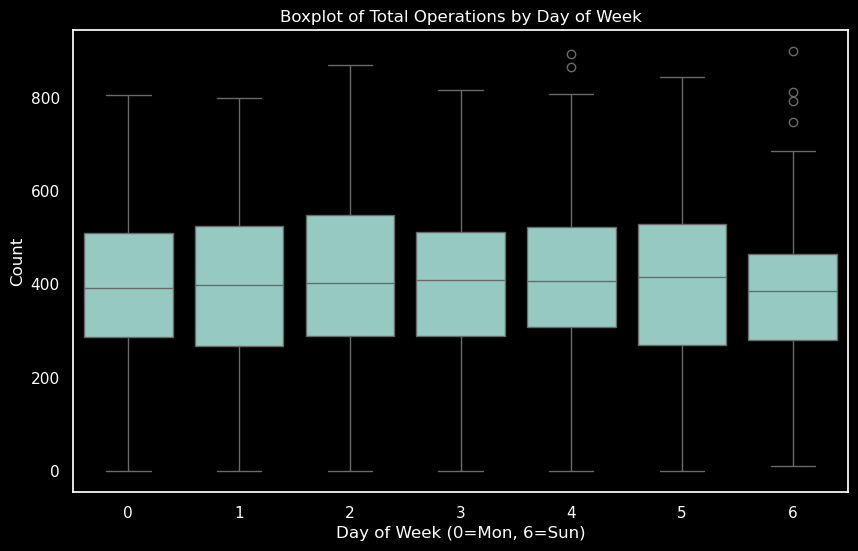

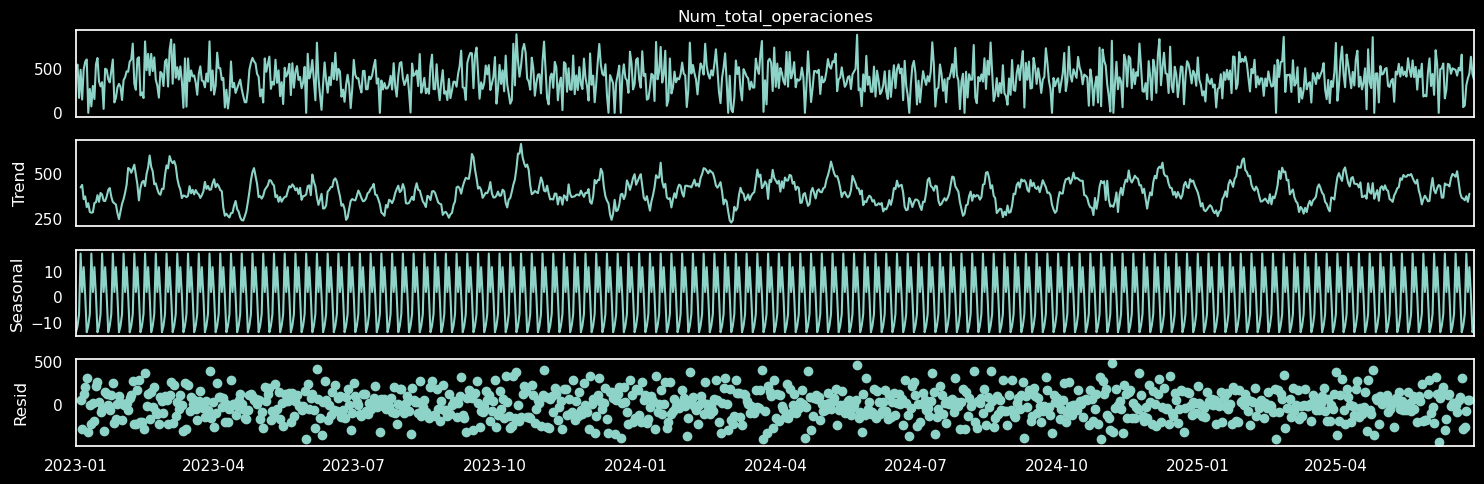

In [100]:
from scipy import stats
import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(df['Num_total_operaciones'], period=7)  # Weekly seasonality

decomp.plot()
plt.show()

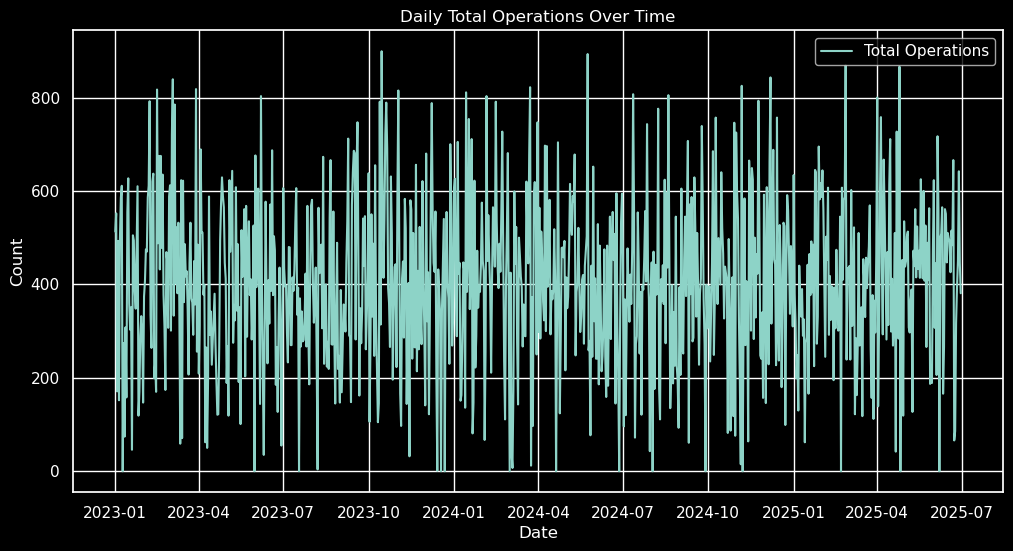

In [101]:
# Gráficos
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(df.index, df['Num_total_operaciones'], label='Total Operations')
ax1.set_title('Daily Total Operations Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True)
plt.show()


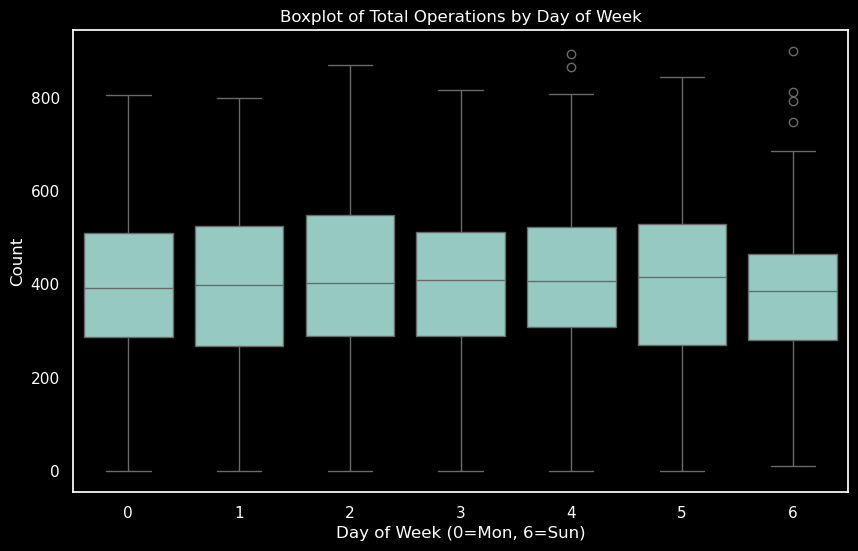

In [ ]:

fig2, ax2 = plt.subplots(figsize=(10,6))
sns.boxplot(x='day_of_weak', y='Num_total_operaciones', data=df, ax=ax2)
ax2.set_title('Boxplot of Total Operations by Day of Week')
ax2.set_xlabel('Day of Week (0=Mon, 6=Sun)')
ax2.set_ylabel('Count')
plt.show()

In [104]:
cv = (df['Num_total_operaciones'].std() / df['Num_total_operaciones'].mean()) * 100
cv

np.float64(44.6846941323538)

In [105]:
monthly_pct_change = monthly_avg.pct_change() * 100
weekly_pct_change = weekly_avg.pct_change() * 100
weekly_pct_change

year  weak_of_year
2023  1                     NaN
      2              -34.803922
      3               22.506266
      4               -4.050736
      5               17.611940
                        ...    
2025  23               3.483529
      24              12.147823
      25              17.194127
      26             -33.129176
      27              11.032473
Name: Num_total_operaciones, Length: 131, dtype: float64

In [109]:
time_index = np.arange(len(df))
df['time'] = time_index


In [111]:
model_trend = sm.OLS(df['Num_total_operaciones'], sm.add_constant(df['time'])).fit()
model_trend.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Num_total_operaciones   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.5700
Date:                   Sat, 23 Aug 2025   Prob (F-statistic):              0.450
Time:                           16:25:11   Log-Likelihood:                -6024.6
No. Observations:                    912   AIC:                         1.205e+04
Df Residuals:                        910   BIC:                         1.206e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        393.0336     11.853     33.158      0.000     369.770     416.297
time           0.0170      0.023      0.755      0.450      -0.027       0.061
==============================================================================
Omnibus:                        2.086   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                2.017
Skew:                           0.061   Prob(JB):                        0.365
Kurtosis:                       2.804   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
z_scores = np.abs(stats.zscore(df['Num_total_operaciones']))
outliers = df[z_scores > 3]
outliers

,Num_total_operaciones,Num_apertura_total,Num_cancelado_total,Num_creditos_total,Num_deposito_total,Num_extracto_cuenta,Num_giro_efectivo_total,Num_recarga_total,Num_retiro_total,Num_total_CVD,Num_total_microseguro,Num_extorno_fecha_total,Num_extorno_dia_total,Num_entrega_tarjeta,year,month,day_of_weak,weak_of_year,time
Fecha,,,,,,,,,,,,,,,,,,,


In [118]:
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Poisson


groups = [df[df['month']==m]['Num_total_operaciones'] for m in df['month'].unique()]
f_stat, p_val_anova = stats.f_oneway(*groups)
kruskal_stat, kruskal_p = stats.kruskal(*groups)
glm_model = glm('Num_total_operaciones ~ C(month) + C(day_of_weak)', data=df, family=Poisson()).fit()
features = df[['month', 'day_of_weak', 'time']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
pca = PCA()
pca.fit(scaled_data)
pca_2d = PCA(n_components=2)
pca_data = pca_2d.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(pca_data)
dw = sm.stats.durbin_watson(glm_model.resid_pearson)

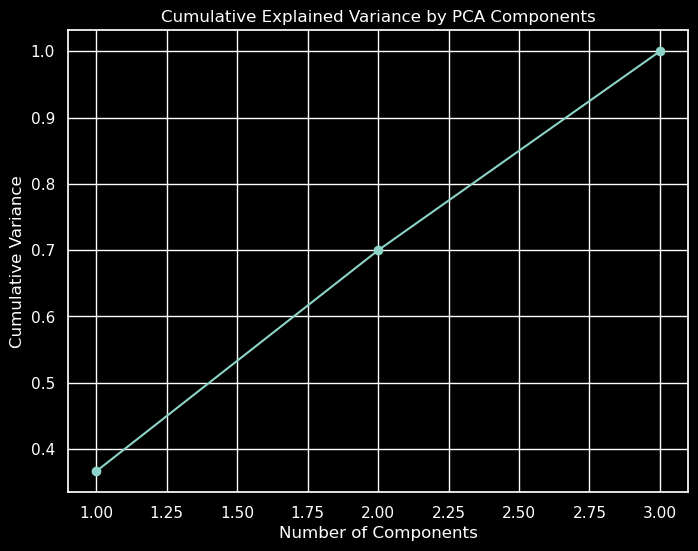

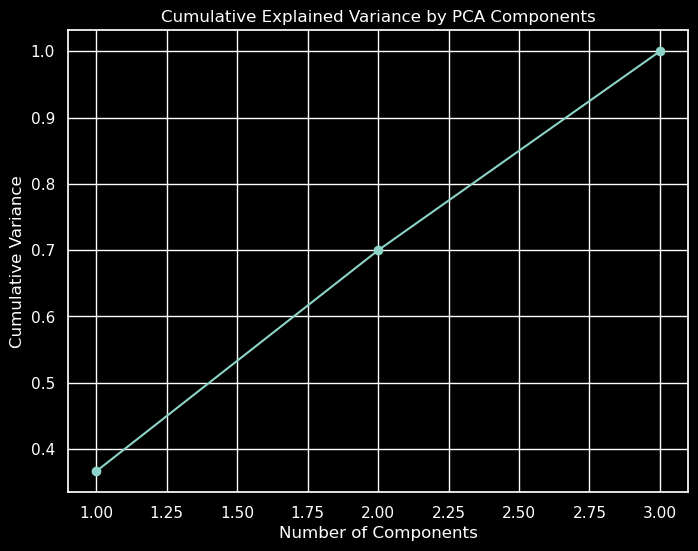

In [120]:
# Gráficos
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
ax3.set_title('Cumulative Explained Variance by PCA Components')
ax3.set_xlabel('Number of Components')
ax3.set_ylabel('Cumulative Variance')
ax3.grid(True)
plt.show()

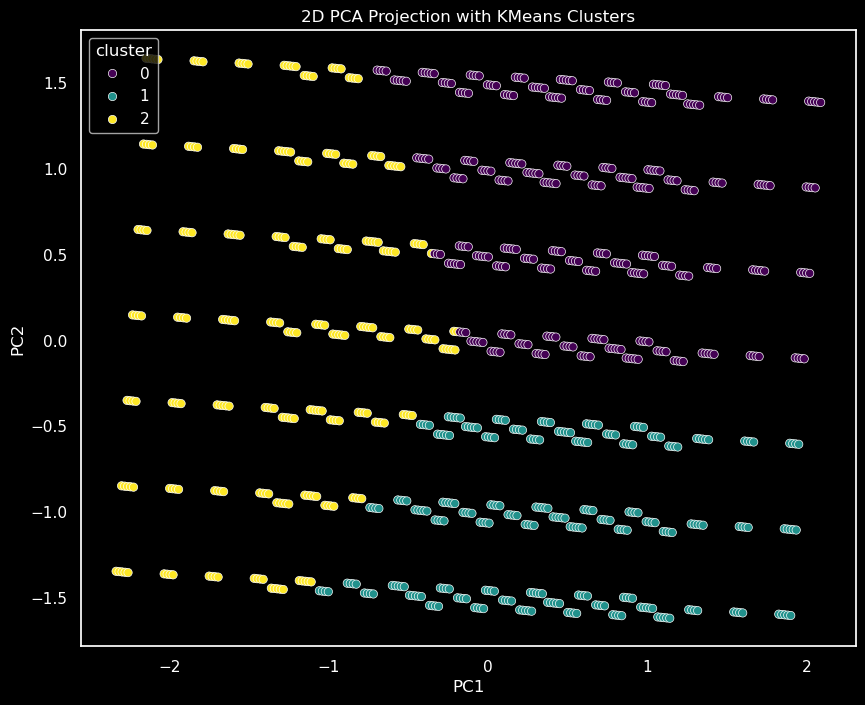

In [121]:
fig4, ax4 = plt.subplots(figsize=(10,8))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['cluster'], palette='viridis', ax=ax4)
ax4.set_title('2D PCA Projection with KMeans Clusters')
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC2')
plt.show()